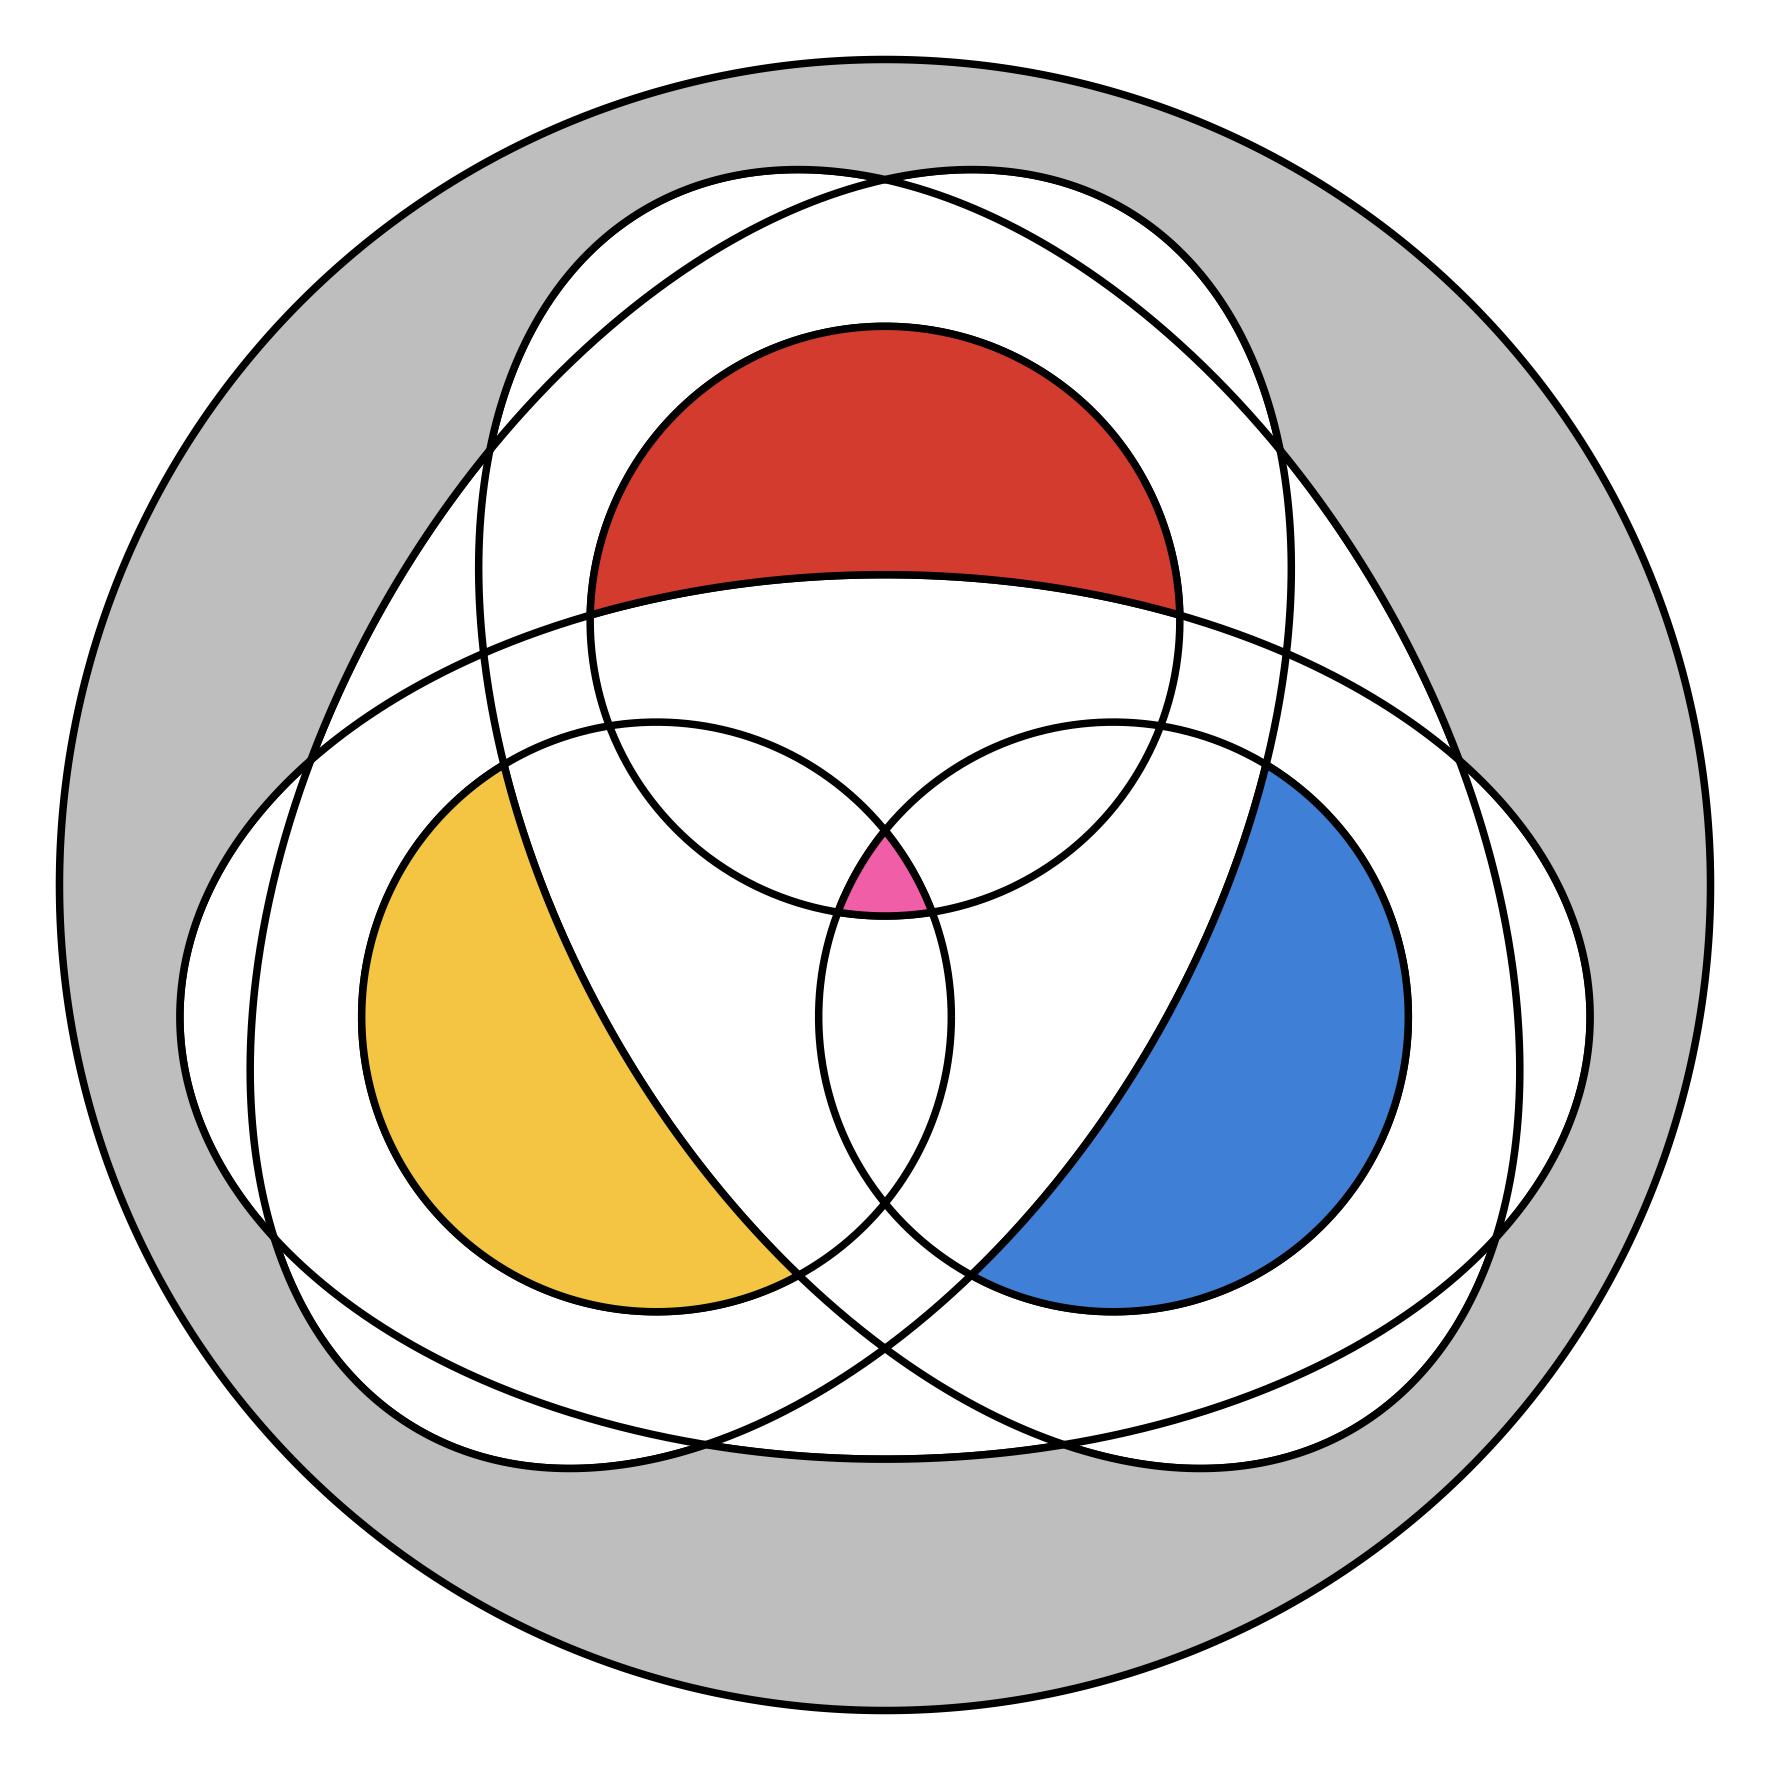

In [10]:
import math
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.affinity import scale, rotate, translate
from descartes import PolygonPatch



def make_circle(center, r, res=256):
    x, y = center
    return Point(x, y).buffer(r, resolution=res)


def make_ellipse(center, rx, ry, angle_deg, res=256):
    """
    Ellipse with semi-axes rx, ry, centered at `center`,
    rotated by angle_deg.
    """
    x0, y0 = center
    e = Point(0, 0).buffer(1.0, resolution=res)   # unit circle
    e = scale(e, rx, ry)                          # stretch to ellipse
    e = rotate(e, angle_deg, use_radians=False)   # rotate
    e = translate(e, xoff=x0, yoff=y0)            # move to center
    return e


# ---------------------------------------------------------------------
# 3 circles: centers on an equilateral triangle, overlapping (Venn-like)
# ---------------------------------------------------------------------
r = 1.0           # radius
d = 1.55          # distance between centers (< 2r => overlapping)

orig_centers = [
    (0.0, 0.0),
    (d, 0.0),
    (d/2.0, math.sqrt(3.0)*d/2.0),
]

# center triangle at origin
cx = sum(c[0] for c in orig_centers) / 3
cy = sum(c[1] for c in orig_centers) / 3
centers = [(x - cx, y - cy) for (x, y) in orig_centers]

circles = [make_circle(c, r) for c in centers]

# ---------------------------------------------------------------------
# 3 ellipses: each encapsulates 2 circles along an edge of the triangle
# ---------------------------------------------------------------------
pairs = [(0, 1), (1, 2), (2, 0)]
ellipses = []

for i, j in pairs:
    (x1, y1) = centers[i]
    (x2, y2) = centers[j]

    # midpoint of the two centers
    mid = ((x1 + x2) / 2, (y1 + y2) / 2)

    # orientation of the line joining the centers
    angle = math.degrees(math.atan2(y2 - y1, x2 - x1))

    # choose ellipse semi-axes:
    # long axis enough to cover both circles, short axis just a bit wider
    rx = (d / 1.2) + 1.1 * r   # along the edge
    ry = 1.5 * r               # thickness

    ellipses.append(make_ellipse(mid, rx, ry, angle))


# ---------------------------------------------------------------------
# Plot
# ---------------------------------------------------------------------
plt.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots(figsize=(6, 6))

# circles
colors = ["#f4c542", "#3f7fd5", "#d33b2f"]
for circ, col in zip(circles, colors):
    ax.add_patch(PolygonPatch(circ, fc='none', ec="black", alpha=1, lw=1.8))

# ellipses (just outlines)
for e in ellipses:
    ax.add_patch(PolygonPatch(e, fc="none", ec="black", lw=1.8, alpha=1.0))


intersection_1 = circles[0].difference(circles[1]).difference(circles[2]).difference(ellipses[1])
intersection_2 = circles[1].difference(circles[0]).difference(circles[2]).difference(ellipses[2])
intersection_3 = circles[2].difference(circles[0]).difference(circles[1]).difference(ellipses[0])
intersction_4 = circles[0].intersection(circles[1]).intersection(circles[2])

ax.add_patch(PolygonPatch(intersection_1, fc=colors[0], lw=1.8, alpha=1.0))
ax.add_patch(PolygonPatch(intersection_2, fc=colors[1], lw=1.8, alpha=1.0))
ax.add_patch(PolygonPatch(intersection_3, fc=colors[2], lw=1.8, alpha=1.0))
ax.add_patch(PolygonPatch(intersction_4, fc='#EF5EA7', lw=1.8, alpha=1.0))

final_circ = make_circle((0, 0), 2.8)
final_circ = final_circ.difference(ellipses[0])
final_circ = final_circ.difference(ellipses[1])
final_circ = final_circ.difference(ellipses[2])
ax.add_patch(PolygonPatch(final_circ, fc='#BEBEBE', lw=1.8))

ax.set_aspect("equal", "box")
ax.set_xlim(-2.9, 2.9)
ax.set_ylim(-2.9, 2.9)
ax.axis("off")
plt.tight_layout()
plt.savefig('logo.png', transparent=True)
plt.show()



In [6]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b